## Пайплайн обучения и применение лучшей из моделей

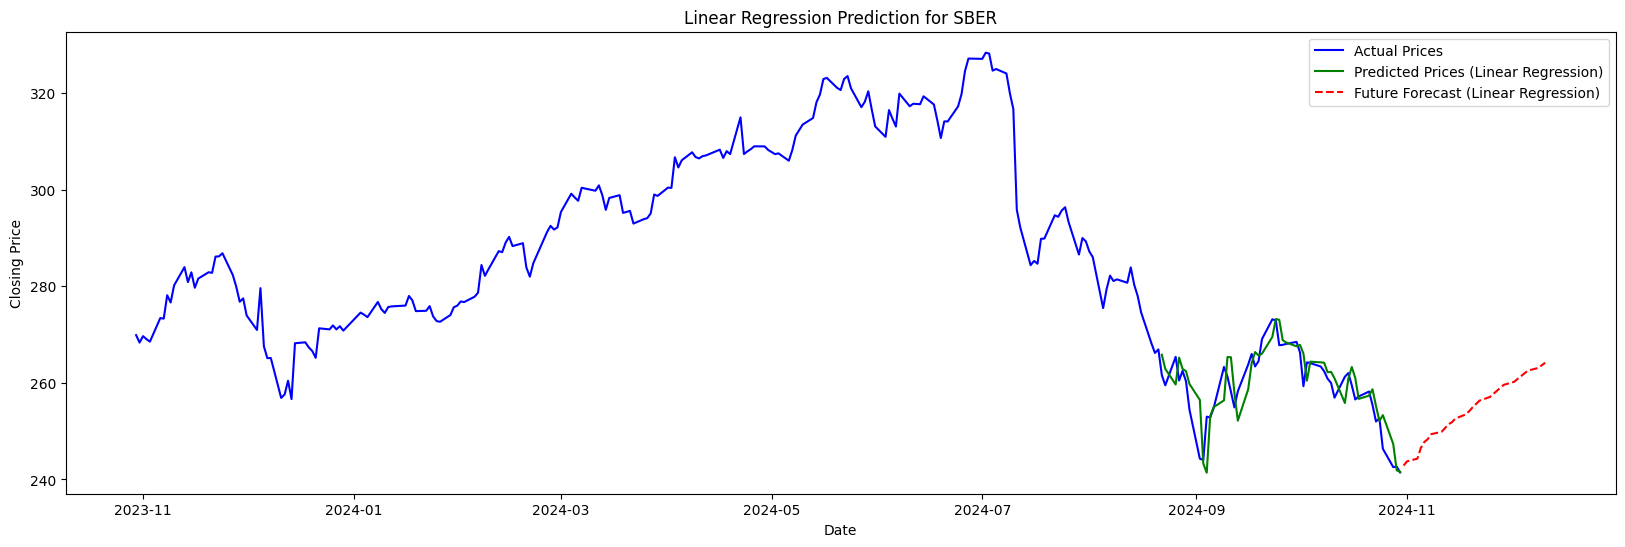

Results for SBER:
  MSE = 18.07452970902773
  MAE = 3.246934351859569
  RMSE = 4.251415024321635
  MAPE = 0.01%
  R² = 0.6862178386837521



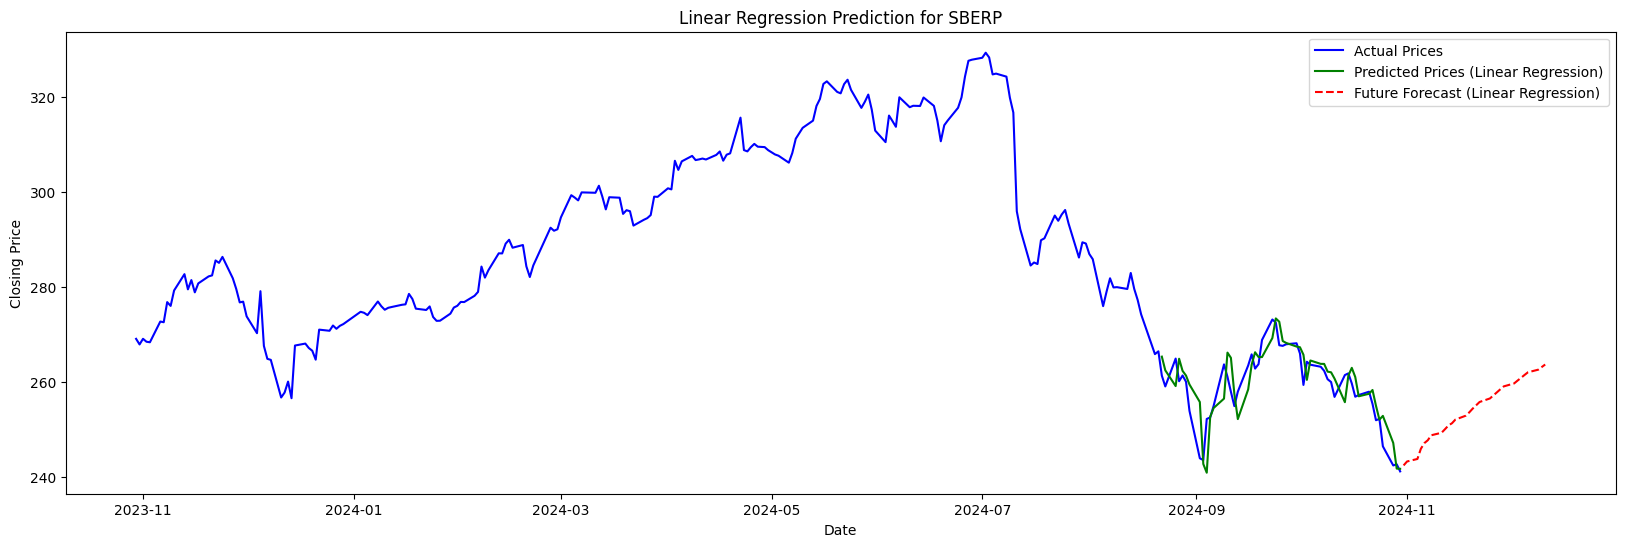

Results for SBERP:
  MSE = 17.6261554274948
  MAE = 3.2148694982652133
  RMSE = 4.198351513093538
  MAPE = 0.01%
  R² = 0.6933749769232206



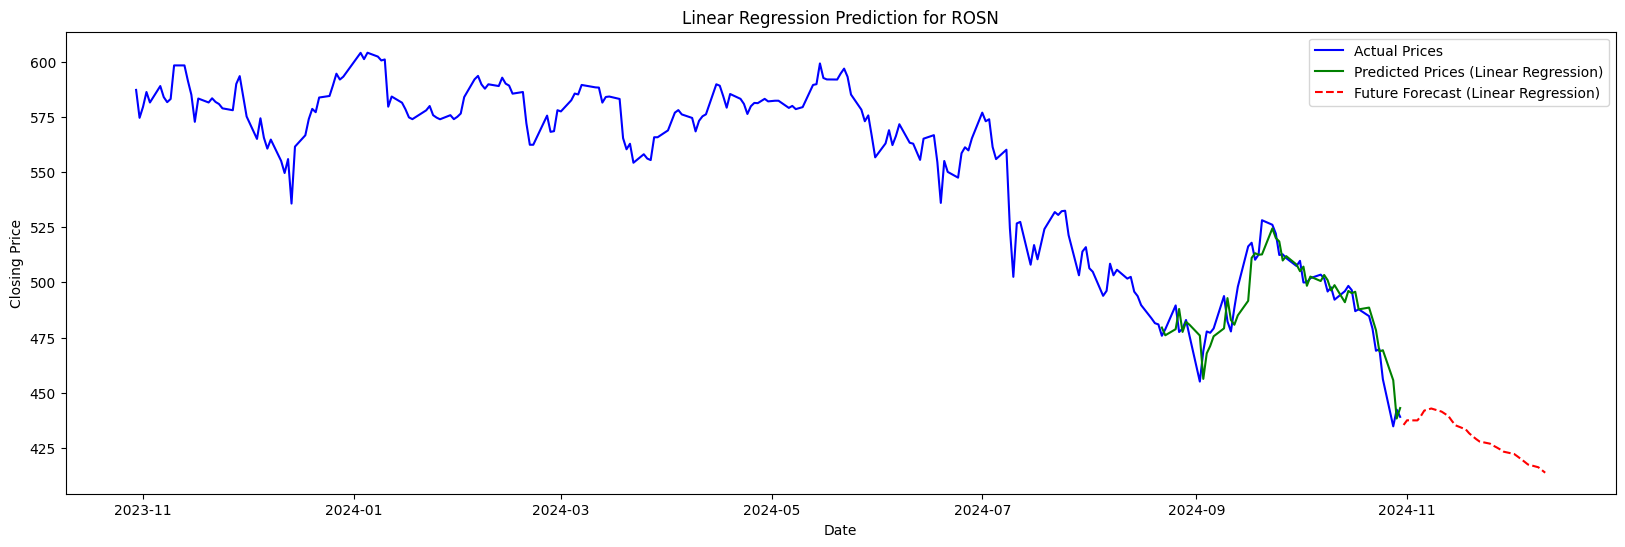

Results for ROSN:
  MSE = 71.68152846685408
  MAE = 6.261651172210182
  RMSE = 8.466494461514404
  MAPE = 0.01%
  R² = 0.8411291631904809



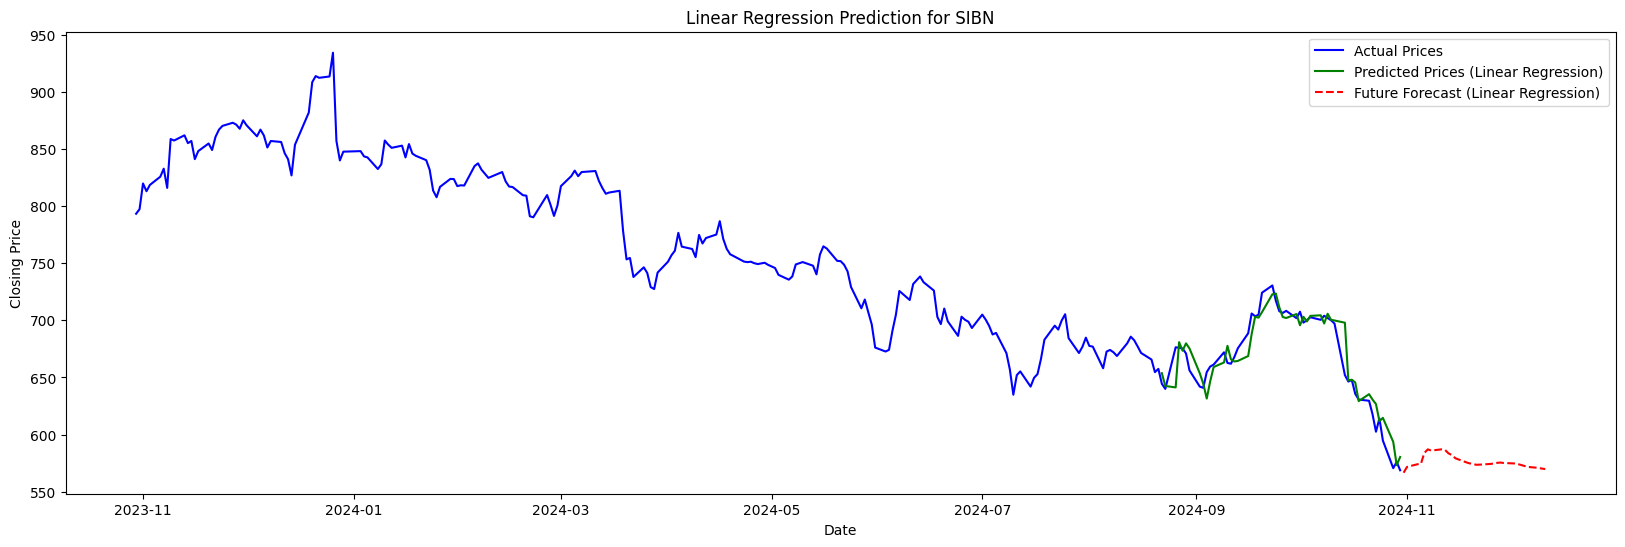

Results for SIBN:
  MSE = 172.40983549179856
  MAE = 9.293969882355771
  RMSE = 13.130492583745614
  MAPE = 0.01%
  R² = 0.893926582225104



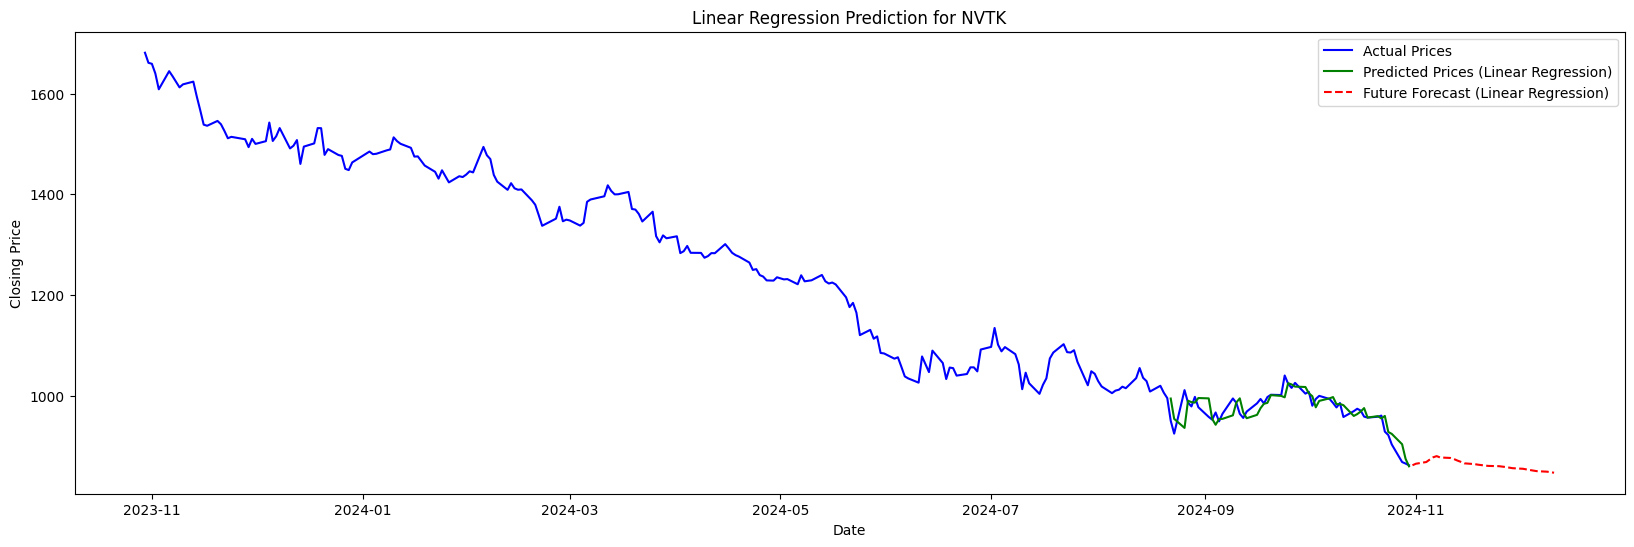

Results for NVTK:
  MSE = 427.101815675677
  MAE = 14.575687720316255
  RMSE = 20.666441775876102
  MAPE = 0.02%
  R² = 0.700659558447268



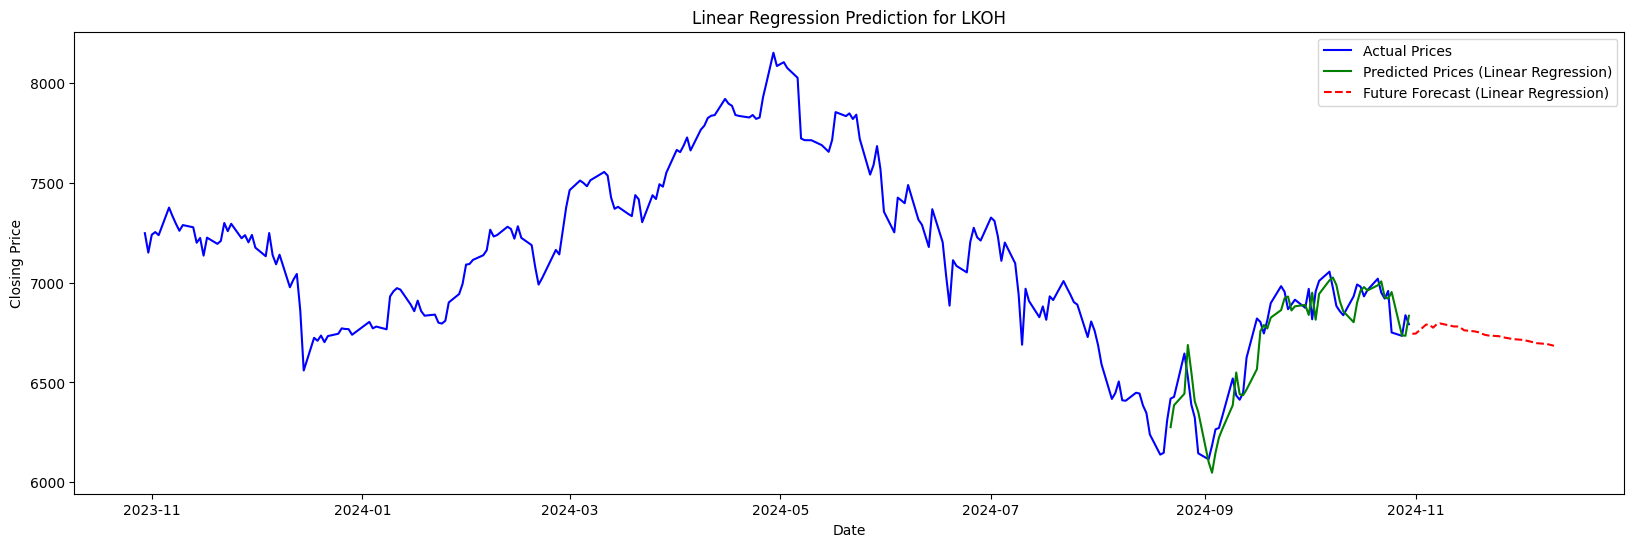

Results for LKOH:
  MSE = 10477.182028064628
  MAE = 81.87291594369292
  RMSE = 102.35810680187782
  MAPE = 0.01%
  R² = 0.8550550302984075



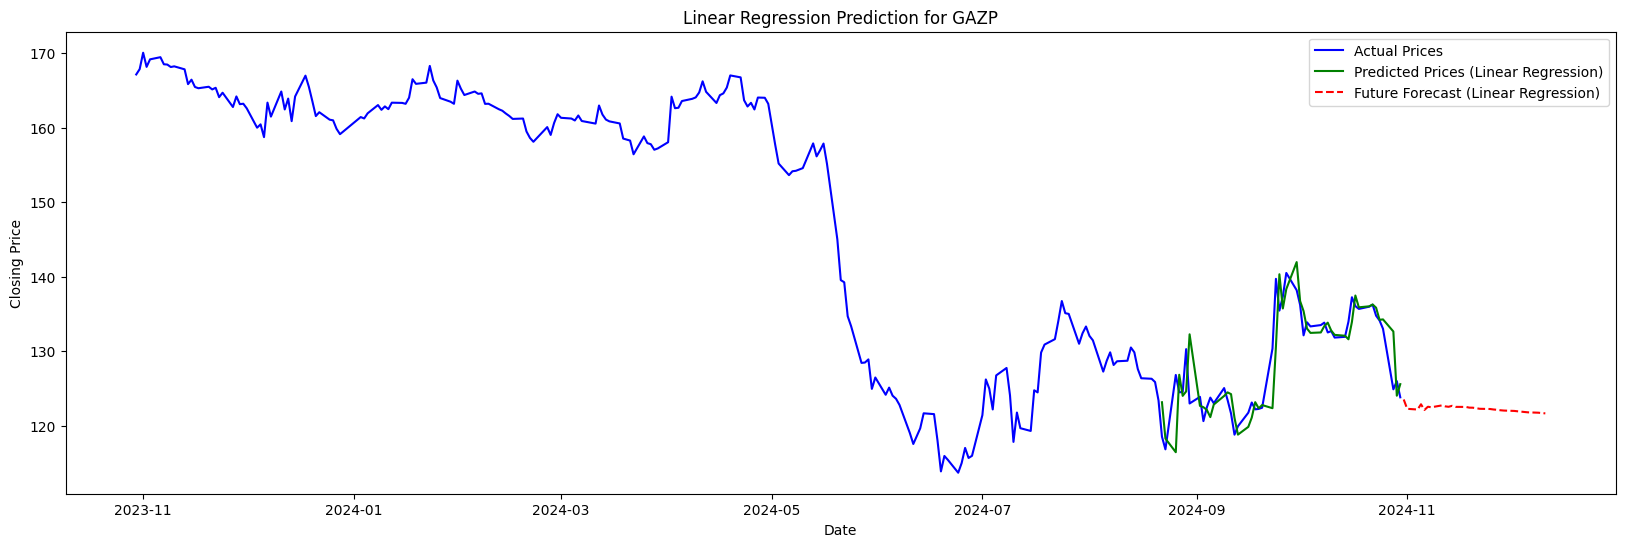

Results for GAZP:
  MSE = 11.76326802667842
  MAE = 2.2729573983952265
  RMSE = 3.4297620947637784
  MAPE = 0.02%
  R² = 0.720856582553262

Unexpected error for ticker GMKN: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


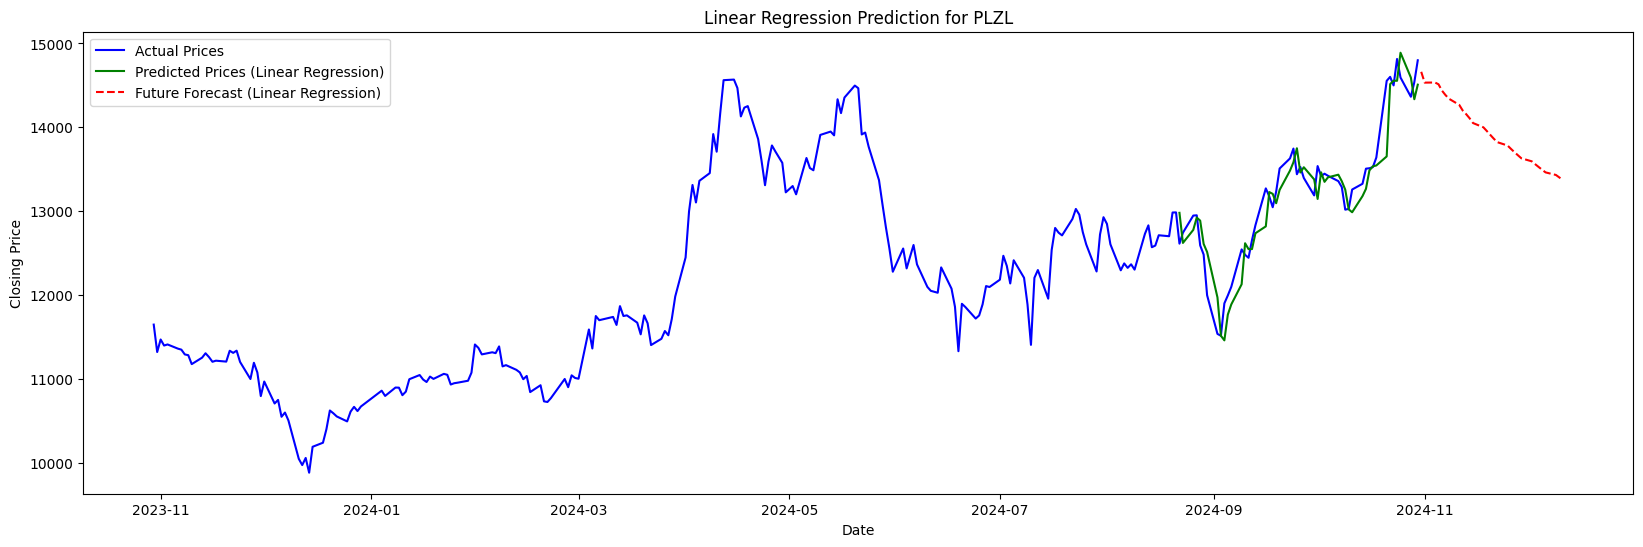

Results for PLZL:
  MSE = 66388.09836448783
  MAE = 198.20027169306178
  RMSE = 257.65887984792573
  MAPE = 0.02%
  R² = 0.8971129135231924



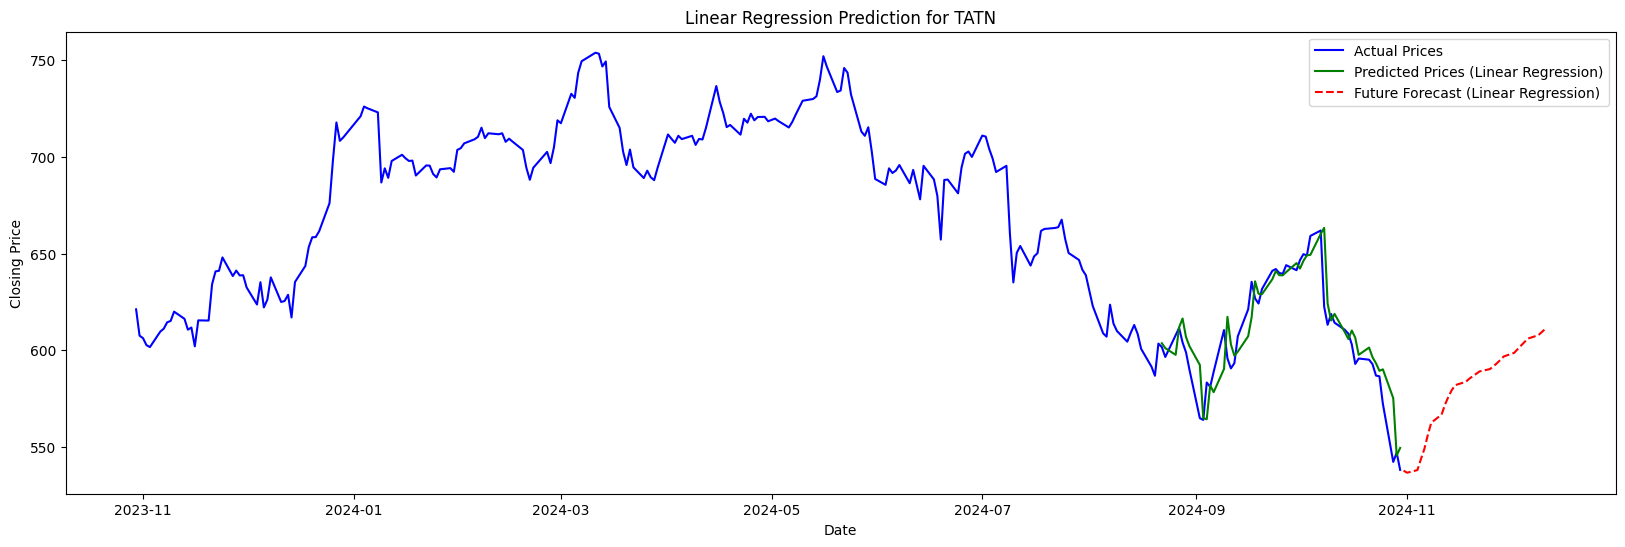

Results for TATN:
  MSE = 146.2660591306223
  MAE = 8.50065496603367
  RMSE = 12.094050567556856
  MAPE = 0.01%
  R² = 0.826525475484195



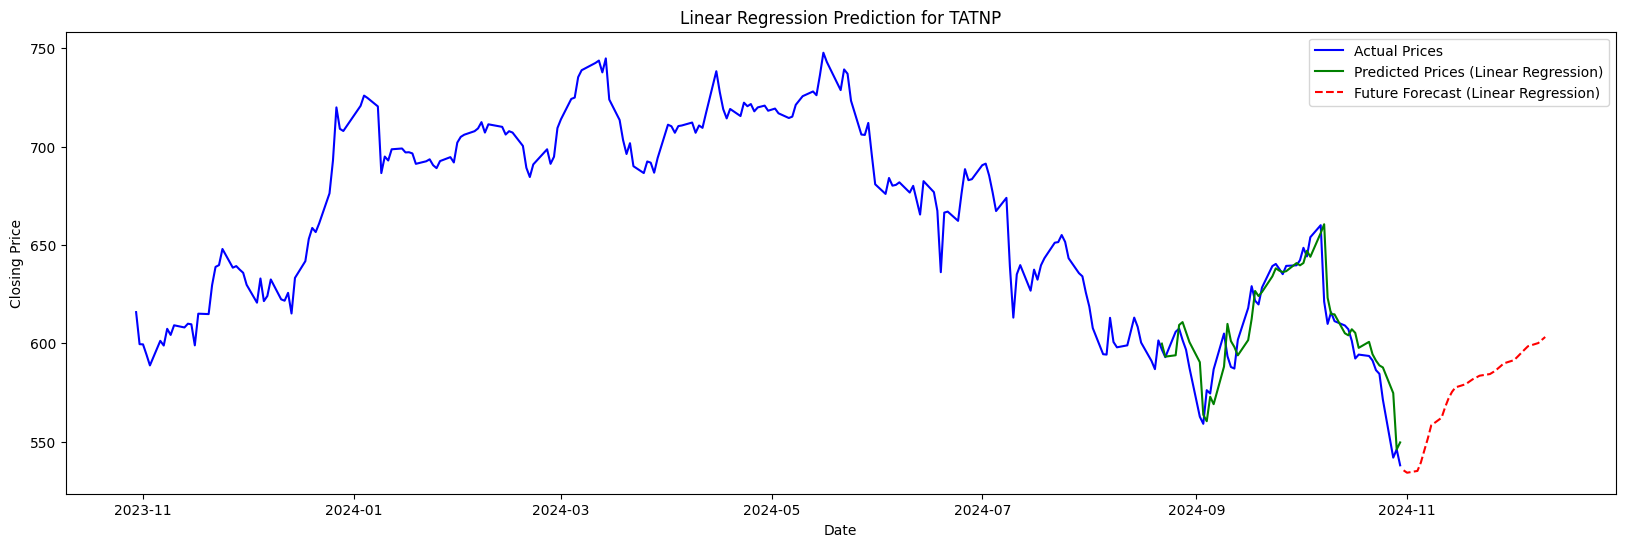

Results for TATNP:
  MSE = 142.92771204213363
  MAE = 8.652626803152998
  RMSE = 11.95523784966797
  MAPE = 0.01%
  R² = 0.8261758150307427

Unexpected error for ticker YDEX: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


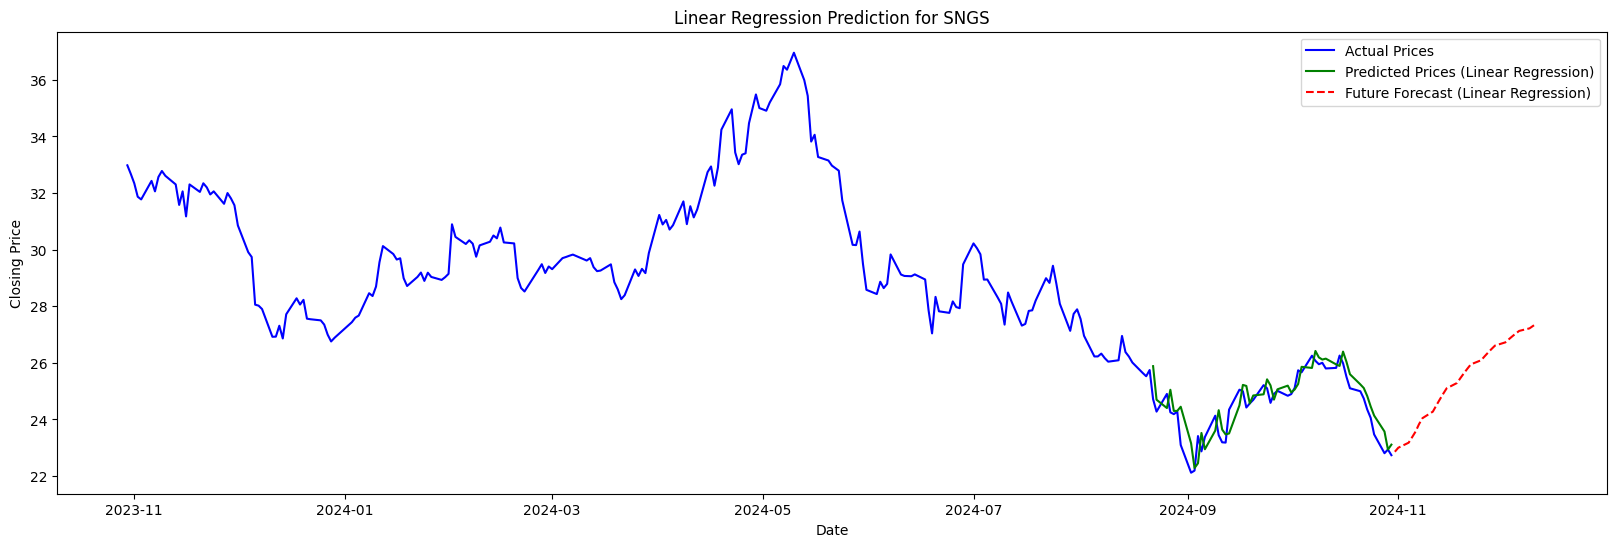

Results for SNGS:
  MSE = 0.2807124085397557
  MAE = 0.4320392653306335
  RMSE = 0.5298229973677584
  MAPE = 0.02%
  R² = 0.7609304576082259



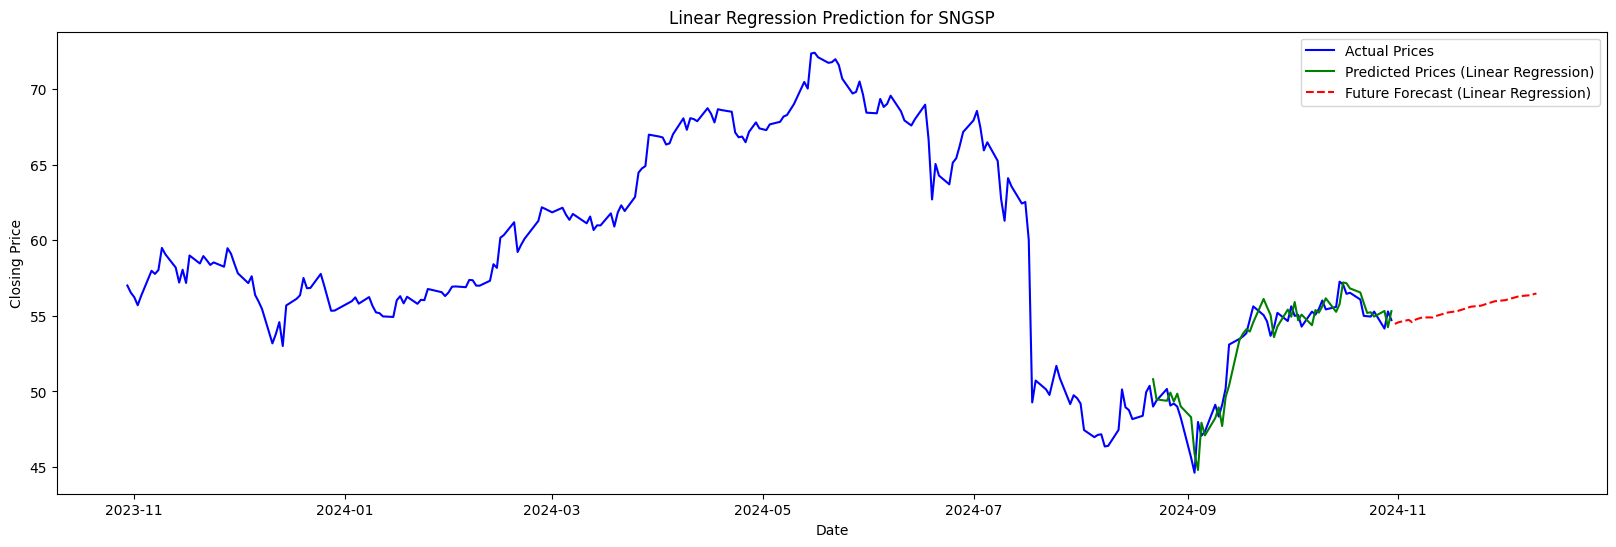

Results for SNGSP:
  MSE = 1.0911246581562448
  MAE = 0.8186708141223531
  RMSE = 1.044569125599759
  MAPE = 0.02%
  R² = 0.9025223082022242



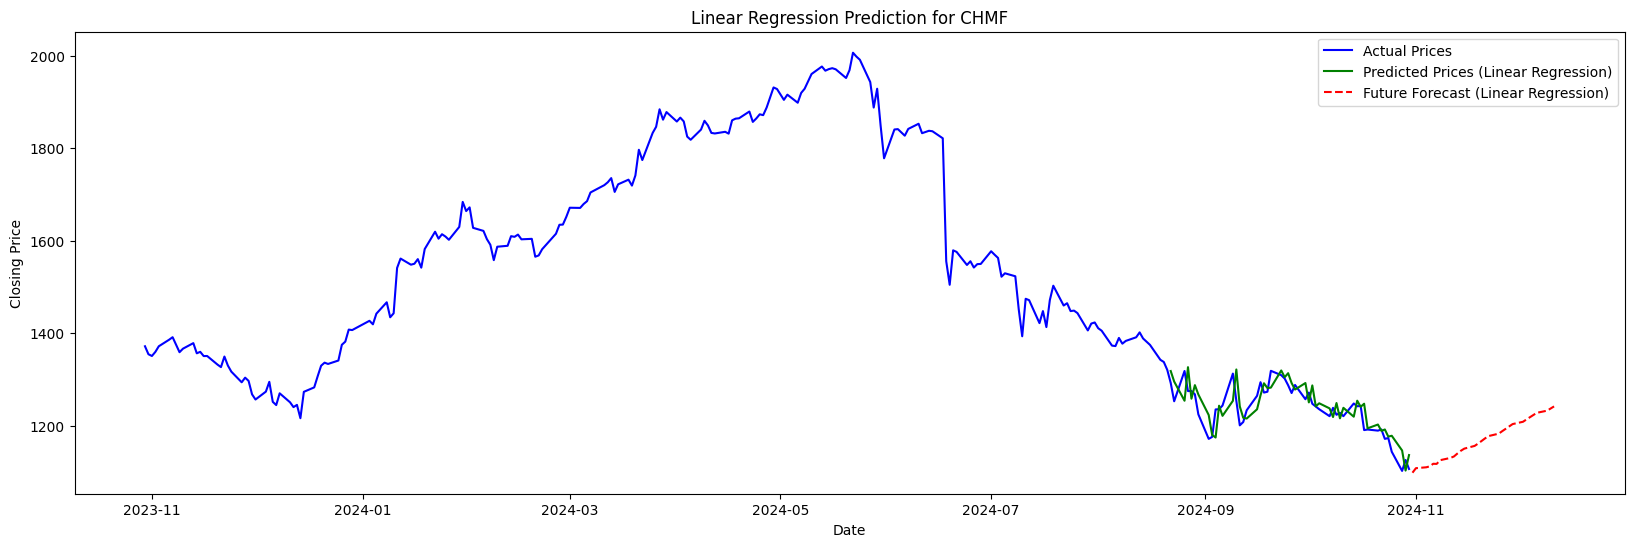

Results for CHMF:
  MSE = 963.8011856659723
  MAE = 25.432843743987632
  RMSE = 31.04514753815759
  MAPE = 0.02%
  R² = 0.6416795454421855



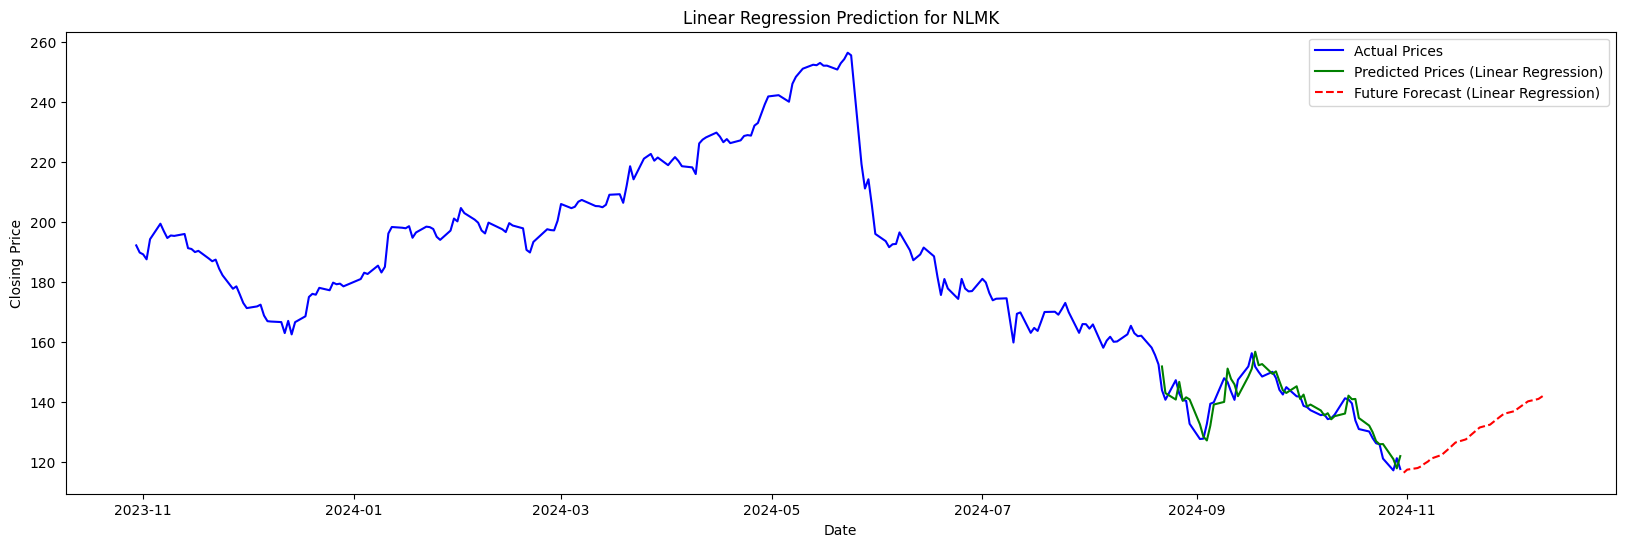

Results for NLMK:
  MSE = 15.338094726353404
  MAE = 3.190425781846324
  RMSE = 3.916387969335189
  MAPE = 0.02%
  R² = 0.8109851224423396



In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt

file_url = "https://drive.google.com/uc?id=1Rn3-XWfgK-fs7-8G2HM9bkLQ9utTA4wJ"
data = pd.read_csv(file_url)

first_tier_tickers = ["SBER", "SBERP", "ROSN",  "SIBN", "NVTK", "LKOH", "GAZP", "GMKN",
                      "PLZL", "TATN", "TATNP", "YDEX", "SNGS", "SNGSP", "CHMF", "NLMK"]
data = data[data['TICKER'].isin(first_tier_tickers)]
data['TRADEDATE'] = pd.to_datetime(data['TRADEDATE'])

def prepare_data(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

def linear_regression_baseline(ticker_data, window_size=10, forecast_days=30):
    ticker_data = ticker_data.sort_values(by='TRADEDATE')
    ticker_data_values = ticker_data['CLOSE'].values
    dates = ticker_data['TRADEDATE'].values

    if len(ticker_data_values) <= window_size:
        print(f"Error: Ticker {ticker_data['TICKER'].iloc[0]} has insufficient data for the given window size. Skipping this ticker.")
        return None

    try:
        X, y = prepare_data(ticker_data_values, window_size)
        train_size = int(len(X) * 0.8)
        X_train, X_test = X[:train_size], X[train_size:]
        y_train, y_test = y[:train_size], y[train_size:]

        model = LinearRegression()
        model.fit(X_train, y_train)

        predictions = model.predict(X_test)

        mse = mean_squared_error(y_test, predictions)
        mae = mean_absolute_error(y_test, predictions)
        rmse = np.sqrt(mse)
        mape = mean_absolute_percentage_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        last_data = ticker_data_values[-window_size:]
        forecast_prices = []
        forecast_dates = pd.date_range(dates[-1], periods=forecast_days + 1, freq='B')[1:]

        for _ in range(forecast_days):
            forecast = model.predict(last_data.reshape(1, -1))
            forecast_prices.append(forecast[0])
            last_data = np.append(last_data[1:], forecast[0])

        plt.figure(figsize=(20, 6))
        plt.plot(dates, ticker_data_values, label='Actual Prices', color='blue')
        plt.plot(dates[train_size + window_size:], predictions, label='Predicted Prices (Linear Regression)', color='green')
        plt.plot(forecast_dates, forecast_prices, label='Future Forecast (Linear Regression)', color='red', linestyle='--')
        plt.xlabel('Date')
        plt.ylabel('Closing Price')
        plt.title(f'Linear Regression Prediction for {ticker_data["TICKER"].iloc[0]}')
        plt.legend()
        plt.show()

        return mse, mae, rmse, mape, r2, forecast_dates, forecast_prices

    except Exception as e:
        print(f"Unexpected error for ticker {ticker_data['TICKER'].iloc[0]}: {e}")
        return None

linear_regression_results = {}
for ticker in first_tier_tickers:
    ticker_data = data[data['TICKER'] == ticker]
    try:
        result = linear_regression_baseline(ticker_data)
        if result is not None:
            mse, mae, rmse, mape, r2, forecast_dates, forecast_prices = result
            linear_regression_results[ticker] = {
                "MSE": mse,
                "MAE": mae,
                "RMSE": rmse,
                "MAPE": mape,
                "R²": r2,
                "Forecast Dates": forecast_dates,
                "Forecast Prices": forecast_prices
            }
            print(f"Results for {ticker}:")
            print(f"  MSE = {mse}")
            print(f"  MAE = {mae}")
            print(f"  RMSE = {rmse}")
            print(f"  MAPE = {mape:.2f}%")
            print(f"  R² = {r2}\n")
    except Exception as e:
        print(f"Error processing ticker {ticker}: {e}")


In [2]:
print("\nLinear Regression Model Results Summary:")
for ticker, metrics in linear_regression_results.items():
    print(f"{ticker}: MSE = {metrics['MSE']}, MAE = {metrics['MAE']}, RMSE = {metrics['RMSE']}, MAPE = {metrics['MAPE']:.2f}%, R² = {metrics['R²']}")


Linear Regression Model Results Summary:
SBER: MSE = 18.07452970902773, MAE = 3.246934351859569, RMSE = 4.251415024321635, MAPE = 0.01%, R² = 0.6862178386837521
SBERP: MSE = 17.6261554274948, MAE = 3.2148694982652133, RMSE = 4.198351513093538, MAPE = 0.01%, R² = 0.6933749769232206
ROSN: MSE = 71.68152846685408, MAE = 6.261651172210182, RMSE = 8.466494461514404, MAPE = 0.01%, R² = 0.8411291631904809
SIBN: MSE = 172.40983549179856, MAE = 9.293969882355771, RMSE = 13.130492583745614, MAPE = 0.01%, R² = 0.893926582225104
NVTK: MSE = 427.101815675677, MAE = 14.575687720316255, RMSE = 20.666441775876102, MAPE = 0.02%, R² = 0.700659558447268
LKOH: MSE = 10477.182028064628, MAE = 81.87291594369292, RMSE = 102.35810680187782, MAPE = 0.01%, R² = 0.8550550302984075
GAZP: MSE = 11.76326802667842, MAE = 2.2729573983952265, RMSE = 3.4297620947637784, MAPE = 0.02%, R² = 0.720856582553262
PLZL: MSE = 66388.09836448783, MAE = 198.20027169306178, RMSE = 257.65887984792573, MAPE = 0.02%, R² = 0.89711291

# Описание построения бейзлайна

Бейзлайн модель, использованная в данном примере, представляет собой **линейную регрессию**, которая пытается предсказать цену закрытия акции на основе исторических данных. Модель использует метод скользящего окна (window-based approach), где для предсказания текущей цены использовались данные о ценах закрытия за предыдущие несколько дней.

### Процесс построения модели:
1. **Данные**: Модель использует исторические данные по цене закрытия акций для нескольких тикеров, а также даты торговли для каждого дня.
2. **Предобработка данных**:
   - Тикеры, не входящие в список `first_tier_tickers`, фильтруются.
   - Индексы столбца `TRADEDATE` конвертируются в формат `datetime`.
3. **Скользящее окно (windowing)**: Для каждого тикера создаются окна с историей цен закрытия размером в 10 дней. Эти окна используются как входные данные для модели, а следующая цена закрытия (через 10 дней) — как целевая переменная.
4. **Моделирование**: Применяется линейная регрессия для прогнозирования следующей цены закрытия на основе предыдущих 10 дней.
5. **Прогнозирование**: После того как модель обучена на тренировочных данных, она предсказывает будущее поведение цены (на 30 дней вперед), используя последние 10 значений.

# Мотивация выбора метрик

Для оценки качества модели были выбраны следующие метрики:

### 1. **MSE (Mean Squared Error)**:
   - Это среднеквадратичная ошибка, которая измеряет средний квадрат разности между предсказанными и фактическими значениями. Это метрика, которая сильно чувствительна к большим ошибкам, так как они возводятся в квадрат. MSE дает хорошее представление о том, насколько хорошо модель прогнозирует данные.
   - **Мотивация**: MSE полезен для выявления крупных ошибок в модели, и его минимизация помогает уменьшить эффект ошибок, возникающих в дальнем прогнозировании.

### 2. **MAE (Mean Absolute Error)**:
   - Средняя абсолютная ошибка измеряет среднее отклонение прогнозируемых значений от фактических. В отличие от MSE, MAE менее чувствителен к выбросам и дает более "практичное" понимание средней величины ошибки.
   - **Мотивация**: MAE более интерпретируемая метрика, особенно если нужно узнать, в среднем, насколько сильно предсказания отклоняются от реальных значений. Это полезно, когда важна точность в "повседневных" прогнозах, а не в случайных крупных отклонениях.

### 3. **RMSE (Root Mean Squared Error)**:
   - Это корень из MSE, который возвращает ошибку в той же единице измерения, что и исходные данные (в данном случае — цена закрытия). RMSE полезен для того, чтобы увидеть, как сильно модель ошибается в среднем.
   - **Мотивация**: RMSE полезен, так как возвращает ошибку в тех же единицах, что и данные, что позволяет лучше понимать масштаб ошибок в предсказаниях.

### 4. **MAPE (Mean Absolute Percentage Error)**:
   - Это средняя абсолютная процентная ошибка, которая измеряет отклонения предсказанных значений от фактических в процентах. Это полезно для того, чтобы понять, насколько сильно модель ошибается в процентах относительно фактических данных.
   - **Мотивация**: MAPE является полезной метрикой, когда необходимо измерить ошибку в процентах и делать выводы, насколько модель хороша в процентах от ожидаемой цены.

### 5. **R² (R-squared)**:
   - Это коэффициент детерминации, который измеряет, насколько хорошо модель объясняет дисперсию данных. Значение R² варьируется от 0 до 1, где 1 означает, что модель идеально объясняет данные, а 0 — что модель не объясняет ничего из наблюдаемых изменений.
   - **Мотивация**: R² предоставляет хорошее представление о том, насколько хорошо линейная модель справляется с предсказанием цены закрытия, и насколько хорошо она объясняет вариации в данных.

# Анализ результатов

- **SBER, SBERP, ROSN, SIBN** и другие тикеры показывают разные результаты на этих метриках. Важно обратить внимание на следующие моменты:
  
  1. **Высокие значения R²** для многих тикеров (например, **SBERP (0.693)**, **ROSN (0.841)**, **SIBN (0.893)**) указывают на то, что модель объясняет значительную часть изменений в цене, что является положительным результатом.
  
  2. **Высокие значения MSE и RMSE** для некоторых тикеров (например, **LKOH (10477.18)** и **PLZL (66388.1)**) свидетельствуют о том, что предсказания модели могут быть очень неточными в определенные моменты, что также указывает на возможность присутствия выбросов или нестабильности на рынке для этих тикеров.

  3. **Очень низкий MAPE** (например, **SNGS (0.02%)**) и **MAE** для некоторых тикеров показывают, что модель очень точно предсказывает эти акции, что указывает на потенциальную стабильность или меньшую волатильность этих активов.

  4. **Ошибка прогноза на будущее**: Несмотря на наличие хороших результатов на обучающих данных, важно помнить, что прогнозирование на 30 дней вперед часто сопряжено с повышенной неопределенностью. Поэтому важно всегда учитывать риски, особенно для нестабильных рынков или в условиях резких изменений цен.

# Заключение

Модель линейной регрессии дала полезные результаты для ряда тикеров, но имеет свои ограничения в плане прогноза на будущее, особенно для тикеров с высокой волатильностью. Выбор метрик оказался обоснованным, так как они дают всестороннюю картину качества модели, включая как точность, так и способность модели объяснять вариацию в данных.
